Import libraries and set global configurations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix

# suppress warnings from libraries for cleaner looking outputs
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 15}) #Setting font size for the plots
pd.set_option('display.max_rows', 500) #Settting display options
pd.set_option('display.max_columns', 500)

Load data

In [2]:
data = pd.read_csv('train.csv')

# Data Understanding, Preparation, and Pre-Processing

Let's look at the data to understand what are the columns available in the dataset.

In [3]:
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [4]:
data.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [5]:
print(f"Shape of the data: {data.shape}")

Shape of the data: (69999, 172)


## Null Value Check

In [6]:
null_data = ((data.isnull().sum() / data.shape[0]) * 100).sort_values(ascending=False)
null_data

max_rech_data_6             74.902499
total_rech_data_6           74.902499
arpu_2g_6                   74.902499
count_rech_3g_6             74.902499
count_rech_2g_6             74.902499
av_rech_amt_data_6          74.902499
arpu_3g_6                   74.902499
night_pck_user_6            74.902499
fb_user_6                   74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_7           74.478207
fb_user_7                   74.478207
max_rech_data_7             74.478207
av_rech_amt_data_7          74.478207
count_rech_2g_7             74.478207
date_of_last_rech_data_7    74.478207
count_rech_3g_7             74.478207
arpu_2g_7                   74.478207
night_pck_user_7            74.478207
arpu_3g_7                   74.478207
arpu_2g_8                   73.689624
av_rech_amt_data_8          73.689624
arpu_3g_8                   73.689624
count_rech_2g_8             73.689624
night_pck_user_8            73.689624
count_rech_3g_8             73.689624
max_rech_dat

Some of the columns have more than 70 percentage of data as null values. Imputing values in these columns with regular techinques might hamper the data as the missing data is high.

Let us drop all the columns that have more than 70 percentage of data as null values.

In [7]:
cols_to_drop = []
for col in data.columns:
    if data[col].isnull().sum() / data.shape[0] > 0.7:
        cols_to_drop.append(col)
print("Columns with more than 70% null values:", cols_to_drop)
data.drop(cols_to_drop,axis=1,inplace=True)

Columns with more than 70% null values: ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [8]:
print("Data shape:", data.shape)

Data shape: (69999, 142)


Let us look at the data again for null values.

In [9]:
null_data = ((data.isnull().sum() / data.shape[0]) * 100).sort_values(ascending=False)
null_data

loc_ic_t2m_mou_8        5.290076
loc_og_t2t_mou_8        5.290076
loc_og_t2f_mou_8        5.290076
ic_others_8             5.290076
isd_ic_mou_8            5.290076
spl_ic_mou_8            5.290076
loc_og_t2c_mou_8        5.290076
std_ic_t2o_mou_8        5.290076
std_ic_t2f_mou_8        5.290076
std_ic_t2m_mou_8        5.290076
std_ic_t2t_mou_8        5.290076
loc_ic_mou_8            5.290076
loc_ic_t2f_mou_8        5.290076
loc_og_mou_8            5.290076
loc_ic_t2t_mou_8        5.290076
std_og_t2t_mou_8        5.290076
og_others_8             5.290076
spl_og_mou_8            5.290076
isd_og_mou_8            5.290076
std_og_mou_8            5.290076
std_og_t2c_mou_8        5.290076
std_og_t2f_mou_8        5.290076
std_og_t2m_mou_8        5.290076
loc_og_t2m_mou_8        5.290076
std_ic_mou_8            5.290076
onnet_mou_8             5.290076
roam_ic_mou_8           5.290076
roam_og_mou_8           5.290076
offnet_mou_8            5.290076
std_og_t2t_mou_6        3.954342
loc_og_mou

For the columns that have null values, let us impute the null values with the most commonly occuring value in the respective columns.

In [10]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        impute_val = data[col].mode(dropna=True)[0]
        data[col][data[col].isna()]= impute_val

Checking the data for null values again.

In [11]:
null_data = ((data.isnull().sum() / data.shape[0]) * 100).sort_values(ascending=False)
null_data

churn_probability       0.0
std_og_t2f_mou_6        0.0
std_og_mou_6            0.0
std_og_t2c_mou_8        0.0
std_og_t2c_mou_7        0.0
std_og_t2c_mou_6        0.0
std_og_t2f_mou_8        0.0
std_og_t2f_mou_7        0.0
std_og_t2m_mou_8        0.0
std_og_mou_8            0.0
std_og_t2m_mou_7        0.0
std_og_t2m_mou_6        0.0
std_og_t2t_mou_8        0.0
std_og_t2t_mou_7        0.0
std_og_t2t_mou_6        0.0
loc_og_mou_8            0.0
std_og_mou_7            0.0
isd_og_mou_6            0.0
loc_og_mou_6            0.0
total_og_mou_6          0.0
loc_ic_t2m_mou_6        0.0
loc_ic_t2t_mou_8        0.0
loc_ic_t2t_mou_7        0.0
loc_ic_t2t_mou_6        0.0
total_og_mou_8          0.0
total_og_mou_7          0.0
og_others_8             0.0
isd_og_mou_7            0.0
og_others_7             0.0
og_others_6             0.0
spl_og_mou_8            0.0
spl_og_mou_7            0.0
spl_og_mou_6            0.0
isd_og_mou_8            0.0
loc_og_mou_7            0.0
loc_og_t2c_mou_8    

We have no null values in the data now.

## Check for duplicates

Now, let us check for any duplicate entries in the dataset.

In [12]:
print("Number of duplicate rows: ", sum(data.duplicated()))

Number of duplicate rows:  0


There are no duplicated rows in the dataset.



## Columns with same data

Columns with only one value althrough can be dropped as they do not add any value to the analysis

In [13]:
print("Columns with only one unique value:", data.columns[data.nunique() == 1])

Columns with only one unique value: Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [14]:
data.drop(data.columns[data.nunique() == 1], axis=1, inplace=True)

## Datatype Check

Now, let us manually check every column in the dataset and see if each column has the right dataset set. Let us analyse the Dtype information of each column and also check the data distribution of numerical variables.

In [15]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 129 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id                   int64  
 1   arpu_6               float64
 2   arpu_7               float64
 3   arpu_8               float64
 4   onnet_mou_6          float64
 5   onnet_mou_7          float64
 6   onnet_mou_8          float64
 7   offnet_mou_6         float64
 8   offnet_mou_7         float64
 9   offnet_mou_8         float64
 10  roam_ic_mou_6        float64
 11  roam_ic_mou_7        float64
 12  roam_ic_mou_8        float64
 13  roam_og_mou_6        float64
 14  roam_og_mou_7        float64
 15  roam_og_mou_8        float64
 16  loc_og_t2t_mou_6     float64
 17  loc_og_t2t_mou_7     float64
 18  loc_og_t2t_mou_8     float64
 19  loc_og_t2m_mou_6     float64
 20  loc_og_t2m_mou_7     float64
 21  loc_og_t2m_mou_8     float64
 22  loc_og_t2f_mou_6     float64
 23  loc_og_t2f_mou_7     float64
 24  l

The datatypes assigned for each variable is appropriate and it does not need any change.

## Date based columns
The columns last_date_of_month_* do not provide any meaningful information for the data and can be dropped.

In [16]:
last_date_cols = [x for x in data.columns if 'last_date_of' in x]
data.drop(last_date_cols,axis=1,inplace=True)

The columns date_of_last_rech_* may not provide useful information as we do not know the time between the last recharge and the time of churn of the user. Dropping these columns from the data.

In [17]:
last_rech_date_cols = [x for x in data.columns if 'date_of_last_rech' in x]
data.drop(last_rech_date_cols,axis=1,inplace=True)

## Removing id column

The  'id' column is not required for analysis and can be removed.

In [18]:
data.drop('id',axis=1,inplace=True)

# Exploratory Data Analysis 

Let us analyse the variables across the three different months between churned and non-churned customers.

Let us see the number of customers who have churned and not churned.

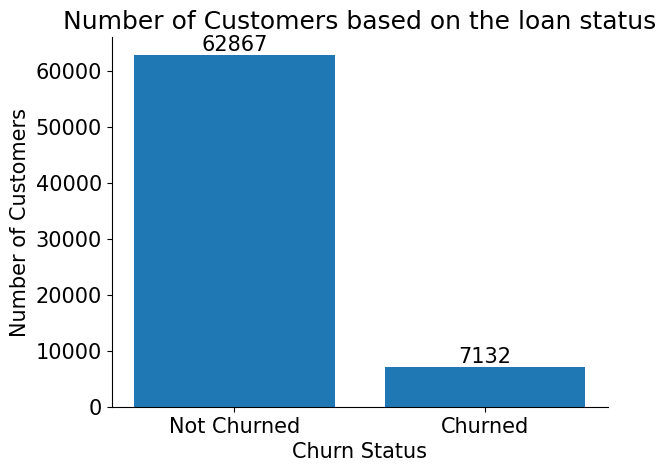

In [19]:
labels, counts = np.unique(data['churn_probability'], return_counts=True) #getting the labels and counts of each category
fig, ax = plt.subplots()

bar = plt.bar(labels, counts, align='center')
ax.bar_label(bar)
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.title('Number of Customers based on the loan status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([0,1], ['Not Churned', 'Churned'])
plt.show()

It can be seen that a good amount of customers have not churned. The ratio of customers churned is low. This is a moderately imbalanced dataset.


Let us check the mean number of 2g and 3g services availed by customers across the three months and see the pattern of how many churned and not churned.

Finding the ratio of data distribution based on class

In [20]:
data['churn_probability'].value_counts(normalize=True).to_frame()

churn_probability
0           0.898113
1           0.101887

### Creating Derived Data for visualization

Creating a column for total minutes of usage as an addition of outgoing and incoming minutes of usage

In [21]:
derived_data = pd.DataFrame()
derived_data['loc_mou_6'] = data['loc_ic_mou_6'] + data['loc_og_mou_6']
derived_data['loc_mou_7'] = data['loc_ic_mou_7'] + data['loc_og_mou_7']
derived_data['loc_mou_8'] = data['loc_ic_mou_8'] + data['loc_og_mou_8']
derived_data['std_mou_6'] = data['loc_ic_mou_6'] + data['loc_og_mou_6']
derived_data['std_mou_7'] = data['loc_ic_mou_7'] + data['loc_og_mou_7']
derived_data['std_mou_8'] = data['loc_ic_mou_8'] + data['loc_og_mou_8']

creating another dataset with just the average of values in the columns in `derived_data`

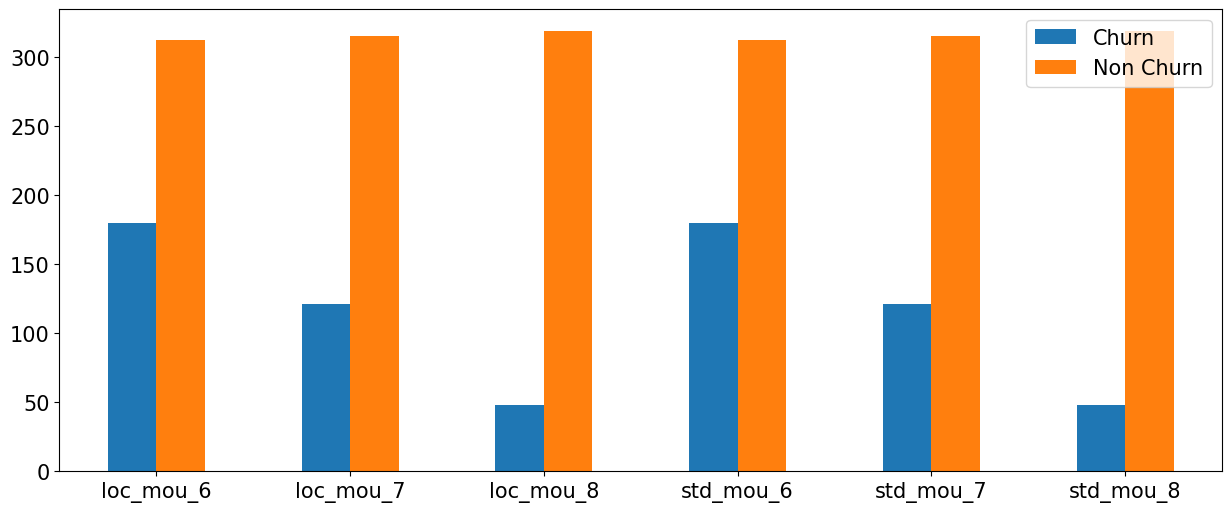

In [22]:
churned = pd.DataFrame([derived_data[data['churn_probability'] == 1].mean()],index={'Churn'})
non_churned = pd.DataFrame([derived_data[data['churn_probability'] == 0].mean()],index={'Non Churn'})

mean_data = pd.concat([churned, non_churned])
mean_data.T.plot.bar(figsize=(15,6), rot=0)
plt.show()

It can be seen that the average minutes of usage is usually low when the customer has churned.

Now, checking the mean of arpu i.e. average revenue per user across the three months of data.

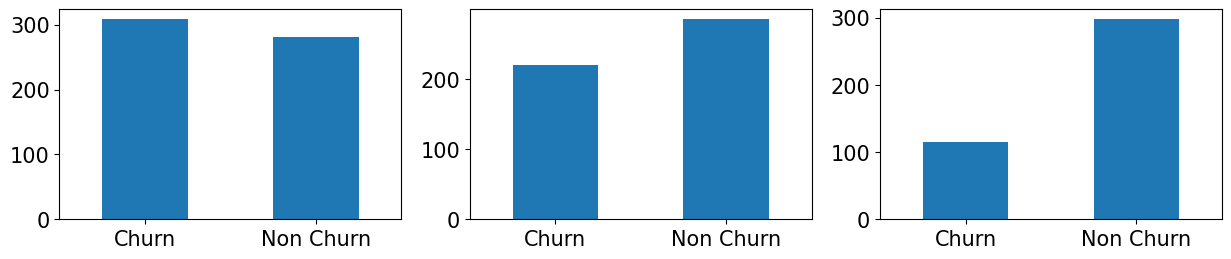

In [23]:
churned = pd.DataFrame([data[data['churn_probability'] == 1].mean()],index={'Churn'})
non_churned = pd.DataFrame([data[data['churn_probability'] == 0].mean()],index={'Non Churn'})

plt.figure(figsize=(15,6))
for idx, mnth in enumerate(range(6,9)):
    plt.subplot(2,3,idx+1)
    mean_data = pd.concat([churned[f'arpu_{mnth}'], non_churned[f'arpu_{mnth}']])
    mean_data.T.plot.bar(figsize=(15,6), rot=0)
plt.show()

There is no clear pattern in churn and non churn customers based on the average revenue per user.

Let us look at the data again.

In [24]:
display(data.head())
print(data.shape)

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               0.0   

   std_og_mou_6  

(69999, 125)


In [25]:
data.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    127.887939    128.754731   
std      334.213918    344.366927    351.924315    295.115497    306.326345   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      5.430000      4.910000   
50%      197.484000    191.588000    192.234000     30.830000     29.160000   
75%      370.791000    365.369500    369.909000    113.100000    108.940000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     125.943607    191.010582    189.585401    186.146273       9.379276   
std      304.990552    312.900706    318.492632    318.453812      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.110000     28.790000     26.690000     23.780000       0.000000   
50%       27.840000     89.810000     85.590000     83.010000       0.000000   
75%      106.280000    223.540000    218.350000    216.410000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        6.745305       6.634328      13.625476       9.464386   
std        54.892940      51.999899      72.055036      57.409013   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   69999.000000      69999.000000      69999.000000      69999.000000   
mean        9.254848         45.050076         44.394344         43.269280   
std        62.923987        148.238746        151.998993        149.944829   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.010000          1.010000          0.760000   
50%         0.000000         10.660000         10.430000         10.060000   
75%         0.000000         38.680000         37.780000         37.260000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          89.551272         87.313796         86.301054          3.595161   
std          159.846546        151.875981        150.286404         13.073900   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.290000          7.530000          6.440000          0.000000   
50%           37.680000         37.010000         35.940000          0.000000   
75%          105.685000        103.330000        103.110000          1.860000   
max         4696.830000       4557.140000       4961.330000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           3.632045          3.467948          1.081499          1.308807   
std           13.324919         12.686917          5.631416          7.765132   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

# Feature Engineeering
## Categorical variables

There are no categorical independent variables in the data after data cleaning. However, the target variable, i.e. churn_probability should be converted as a category.

In [26]:
data['churn_probability'] = data['churn_probability'].astype('category')

## Outlier removal

Now checking for outliers in the data. 

Let us tabulate the quantile-wise values for every variable in the data. Observe the difference between the 99% quantile and max value in the column.

In [27]:
# Checking for outliers in the continuous variables
data.describe(percentiles=[.25,.5,.75,.90,.95,.99]).drop(['count','mean','std'],axis=0).style.bar()

In [28]:
numerical_cols = list(set(data.columns) - {'churn_probability'})

Assigning all values above 99 percent quantile as the value at 99th quantile.

In [29]:
#chg_after_99pc = data.quantile([0.99,1.0]).pct_change().mul(100).iloc[-1]
#outlier_cond = chg_after_99pc > 100
#outlier_cols = outlier_cond.index.values.tolist()

In [30]:
#for col in outlier_cols:
#    if col in numerical_cols:
#        val_at_99pc = data[col].quantile(0.99)
#        cond = data[col] > val_at_99pc
#        data.loc[cond, col] = val_at_99pc

In [31]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99]).drop(['count','mean','std'],axis=0).style.bar()

In [32]:
data.drop(data.columns[data.nunique() == 1], axis=1, inplace=True)
numerical_cols = list(set(data.columns) - {'churn_probability'})

## Correlation Analysis

Since the number of variables are too high we will not be able to visualize a correlation plot easily. Instead, we print the correlation values as a table.

In [33]:
corr_vals = data.corr().abs()
corr_vals.style.bar()

In [34]:
def create_corr_val_list(corr_vals):
    corr_df = pd.DataFrame()
    var1_col, var2_col, corr_col = [], [], []
    for var1 in corr_vals.index.values: 
        for var2 in corr_vals.index.values:
            vars = sorted([var1, var2])
            if var1 == var2:
                continue
            var1_col.append(vars[0])
            var2_col.append(vars[1])
            corr_col.append(corr_vals.loc[var1,var2])
    
    corr_df['Variable1'] = var1_col
    corr_df['Variable2'] = var2_col
    corr_df['Correlation_Value'] = corr_col
    corr_df.drop_duplicates(inplace=True)
    corr_df = corr_df.sort_values(by='Correlation_Value',ascending=False, key=abs)
    
    return corr_df         

Listing the absolute correlation values in descending order and their corresponding variables

In [35]:
corr_val_list = create_corr_val_list(corr_vals)
corr_val_list[corr_val_list['Correlation_Value'] > 0.5].style.bar().hide_index()

In [36]:
corr_val_list[corr_val_list['Correlation_Value'] > 0.8].style.bar().hide_index()

Now, removing highly correlated variables. Taking a correlation value threshold as 0.8 and removing all variables that are above this.

In [37]:
correlated_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'loc_og_t2m_mou_8',
                   'loc_og_t2m_mou_7','loc_og_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_6',
                   'loc_ic_t2m_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_7','std_og_t2t_mou_6',
                   'std_ic_t2m_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8', 'loc_og_mou_8',
                   'loc_og_mou_7','loc_og_mou_6','loc_ic_mou_8', 'loc_ic_mou_7', 'total_og_mou_7',
                   'total_og_mou_8', 'loc_og_t2t_mou_8','loc_og_t2t_mou_7','total_og_mou_6',
                   'loc_ic_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'onnet_mou_8',
                   'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_t2t_mou_7','std_og_mou_8',
                   'std_og_t2m_mou_6','arpu_8','arpu_6','arpu_7' ]
data.drop(correlated_cols, axis=1, inplace=True)

In [38]:
numerical_cols = list(set(data.columns) - {'churn_probability'})

In [39]:
print("Number of Columns in data:", data.shape[1])

Number of Columns in data: 89


#  Model Selection, Model Building, and  Prediction

Creating training and cross validation data from the original data

In [40]:
train_data, crossval_data = train_test_split(data, train_size=0.7, test_size=0.3, random_state=27)

In [41]:
# Predictor data with all independent variables
X_train = train_data.drop(['churn_probability'], axis=1)
X_crossval = crossval_data.drop(['churn_probability'], axis=1)

# Target data
y_train = train_data['churn_probability']
y_crossval = crossval_data['churn_probability']

## Scaling the data

Since each variable has different range, let us normalize the data

In [42]:
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_crossval[numerical_cols] = scaler.transform(X_crossval[numerical_cols])

## Loading test data

Loading test data from test.csv

In [43]:
test_data = pd.read_csv('test.csv')
test_solution = pd.read_csv('solution.csv')
test_data = test_data[X_train.columns.values.tolist()]

Imputing missing data in test_data and also filtering only the required columns

In [44]:
test_data = test_data[X_train.columns.values.tolist()]

for col in test_data.columns:
    if test_data[col].isnull().sum() > 0:
        impute_val = test_data[col].mode(dropna=True)[0]
        test_data[col][test_data[col].isna()]= impute_val

Normalizing data with the same scaler object

In [45]:
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

Preparing test data's solution as y_test

In [46]:
ids = test_solution['id']
test_solution.drop(['id'],axis=1,inplace=True)
X_test = test_data
y_test = test_solution

## Creating PCA transformation to reduce the number of variables

In [47]:
pca = PCA(random_state=1)

In [48]:
pca.fit(X_train)

PCA(random_state=1)

Plotting Scree plot to determing the number of variables required.

In [49]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

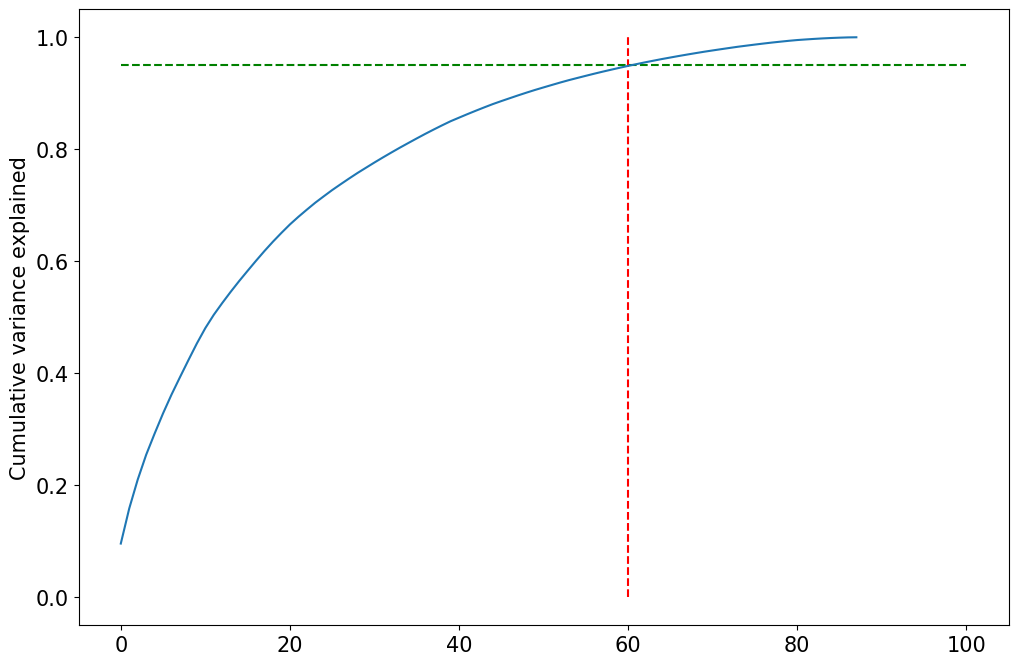

In [50]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Now fitting and transforming PCA on the training data.

In [51]:
pca_60 = IncrementalPCA(n_components=60)
df_train_pca = pca_60.fit_transform(X_train)
print("Shape of transformed data:", df_train_pca.shape)

Shape of transformed data: (48999, 60)


Applying the same PCA transformation on test dataset.

In [52]:
df_train_pca

array([[-1.13881910e+00,  1.29508518e+00, -4.37648492e-01, ...,
        -1.10668967e-01,  5.04146817e-01,  1.34155633e-01],
       [-1.22926440e+00,  1.17408427e+00, -1.36245136e+00, ...,
        -7.11546637e-01,  6.55130925e-01, -9.12220829e-02],
       [ 1.21017195e+00, -3.38385376e+00,  2.12974630e+00, ...,
         3.04615651e-01, -6.03470894e-01, -3.36798625e-01],
       ...,
       [-1.38735854e+00, -1.50138009e+00,  1.84411865e+00, ...,
        -1.20627791e-01,  3.69588701e-02,  8.20153825e-02],
       [-2.35190574e+00, -8.21044781e-02,  6.67209954e-01, ...,
        -2.69325919e-02,  4.90436928e-02, -2.48291553e-04],
       [-6.72210179e-01, -1.10159609e+00,  4.15673803e-01, ...,
        -1.03073902e-01, -3.80395197e-01,  2.23182897e-02]])

In [53]:
df_crossval_pca = pca_60.transform(X_crossval)
df_crossval_pca.shape

(21000, 60)

In [54]:
def print_metrics(target, pred, model_name):
    print("===========================================================")
    print(f"{model_name} Model Metrics")
    print("===========================================================\n")
    
    conf_mat = confusion_matrix(target, pred)
    print("Confusion matrix:")
    display(conf_mat)
    
    acc = round(accuracy_score(target, pred),4)
    rec = round(recall_score(target, pred),4)
    prec = round(precision_score(target, pred),4)
    auc = round(roc_auc_score(target, pred),4)
    f1 = round(f1_score(target, pred),4)
    
    metrics = [[model_name,acc,rec,prec,auc,f1]] 
    metric_data = pd.DataFrame(metrics, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])
    display(metric_data.iloc[0])

### Model 1: PCA 1 + Logistic Regression

In [55]:
logistic_model1 = LogisticRegression()

In [56]:
logistic_pca = logistic_model1.fit(df_train_pca, y_train)

In [57]:
pred_probs_test = logistic_pca.predict_proba(df_crossval_pca)[:,1]

In [58]:
"ROC AUC score: {:2.2}".format(metrics.roc_auc_score(y_crossval, pred_probs_test))

'ROC AUC score: 0.87'

In [59]:
print_metrics(y_crossval, np.where(pred_probs_test< 0.5, 0, 1), "(Cross validation data) PCA 1 + Logistic Regression")

(Cross validation data) PCA 1 + Logistic Regression Model Metrics

Confusion matrix:


array([[18756,   186],
       [ 1679,   379]])

Model        (Cross validation data) PCA 1 + Logistic Regre...
Accuracy                                                0.9112
Precision                                               0.1842
Recall                                                  0.6708
AUC                                                     0.5872
F1                                                       0.289
Name: 0, dtype: object

In [60]:
 logistic_pca.predict_proba(df_crossval_pca)[:,1]

array([0.04370013, 0.01520666, 0.09764111, ..., 0.02492127, 0.00797196,
       0.14067635])

In [61]:
df_test_pca = pca_60.transform(X_test)
df_test_pca.shape

(30000, 60)

In [62]:
df_test_pca

array([[-2.43187133e+00,  1.23090611e-01, -2.34881365e-01, ...,
        -1.15757725e-01, -1.03093971e-01,  3.55535404e-03],
       [ 8.65382853e-01, -2.92822648e-01, -1.70798760e+00, ...,
        -2.62839575e-01,  4.38702306e-01, -9.72540678e-02],
       [ 1.95228525e+00,  1.48697616e+00, -5.85061674e-01, ...,
         8.16261109e-02, -2.14130690e-01,  3.96122814e-02],
       ...,
       [-2.30093702e+00,  1.97276823e-01, -5.95811807e-02, ...,
         2.32672909e-02,  7.49121409e-02,  5.28370969e-02],
       [ 3.62703967e+00, -5.93896524e+00,  3.35065794e+00, ...,
        -7.43181009e-01,  1.37933426e-01,  5.33325772e-01],
       [ 6.67486155e+00,  5.97611744e+00,  1.61842510e+00, ...,
         3.75462478e-01,  1.58120607e-01,  3.27884379e-03]])

In [63]:
pred_probs_test = logistic_pca.predict_proba(df_test_pca)[:,1]

In [64]:
 logistic_pca.predict_proba(df_test_pca)

array([[0.99444458, 0.00555542],
       [0.96658304, 0.03341696],
       [0.93495387, 0.06504613],
       ...,
       [0.87057244, 0.12942756],
       [0.75143445, 0.24856555],
       [0.99129261, 0.00870739]])

In [65]:
pred_probs_test

array([0.00555542, 0.03341696, 0.06504613, ..., 0.12942756, 0.24856555,
       0.00870739])

In [66]:
"ROC AUC score: {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'ROC AUC score: 0.87'

In [67]:
print_metrics(y_test, np.where(pred_probs_test< 0.5, 0, 1), "(Test data) PCA 1 + Logistic Regression")

(Test data) PCA 1 + Logistic Regression Model Metrics

Confusion matrix:


array([[26667,   274],
       [ 2528,   531]])

Model        (Test data) PCA 1 + Logistic Regression
Accuracy                                      0.9066
Precision                                     0.1736
Recall                                        0.6596
AUC                                           0.5817
F1                                            0.2748
Name: 0, dtype: object

### Creating Another PCA transform

Let us create another PCA transform which could explain the data upto 90 %.

In [68]:
pca_again = PCA(0.9)

In [69]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [70]:
df_train_pca2.shape

(48999, 49)

There are only 49 variables in this data. Let us name this PCA transform as PCA 2

In [71]:
df_crossval_pca2 = pca_again.transform(X_crossval)
df_crossval_pca2.shape

(21000, 49)

### Model 2: PCA 2 + Logistic Regression

In [72]:
logistic_model2 = LogisticRegression()

In [73]:
logistic_pca2 = logistic_model2.fit(df_train_pca2, y_train)

In [74]:
df_crossval_pca2 = pca_again.transform(X_crossval)

In [75]:
df_crossval_pca2

array([[-1.3894277 , -0.3889691 ,  1.14906207, ...,  0.06588997,
        -0.03179606,  0.08911128],
       [-0.09029329, -1.06341423,  0.44055902, ...,  0.25980016,
         0.66794513,  0.5928259 ],
       [-1.71492545, -0.43953551,  0.90641429, ...,  0.08489297,
         0.11549643,  0.28783527],
       ...,
       [ 0.09529216,  1.47113795,  0.31819195, ..., -0.00655159,
        -0.07059998, -0.195652  ],
       [-1.37664366, -0.40665536,  1.75506035, ...,  0.20797217,
        -0.09081522,  0.01567842],
       [-2.16087125, -0.58237795,  0.99969642, ...,  0.0879743 ,
         0.01028062,  0.22926512]])

In [76]:
pred_probs_test2 = logistic_pca2.predict_proba(df_crossval_pca2)[:,1]

In [77]:
"{:2.2}".format(metrics.roc_auc_score(y_crossval, pred_probs_test2))

'0.86'

In [78]:
metrics.accuracy_score(y_crossval, np.where(pred_probs_test2< 0.5, 0, 1))

0.9104761904761904

In [79]:
print_metrics(y_crossval, np.where(pred_probs_test2< 0.5, 0, 1), "(Cross validation data) PCA 2 + Logistic Regression")

(Cross validation data) PCA 2 + Logistic Regression Model Metrics

Confusion matrix:


array([[18757,   185],
       [ 1695,   363]])

Model        (Cross validation data) PCA 2 + Logistic Regre...
Accuracy                                                0.9105
Precision                                               0.1764
Recall                                                  0.6624
AUC                                                     0.5833
F1                                                      0.2786
Name: 0, dtype: object

In [80]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(30000, 49)

In [81]:
pred_probs_test2 = logistic_pca2.predict_proba(df_test_pca2)[:,1]

In [82]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.87'

In [83]:
X_test.shape

(30000, 88)

In [84]:
print_metrics(y_test, np.where(pred_probs_test2< 0.5, 0, 1), "(Test data) PCA 2 + Logistic Regression")

(Test data) PCA 2 + Logistic Regression Model Metrics

Confusion matrix:


array([[26684,   257],
       [ 2552,   507]])

Model        (Test data) PCA 2 + Logistic Regression
Accuracy                                      0.9064
Precision                                     0.1657
Recall                                        0.6636
AUC                                           0.5781
F1                                            0.2652
Name: 0, dtype: object

There is not much difference in the accuracy metrics between PCA 1 and PCA 2 transforms. Let us use PCA 2 for the rest of the analysis.

Also, for the sake of simplicity let us test only the test dataset for the models.

### Model 3:  DecisionTreeClassifier

Creating a model using decision tree.

In [85]:
dt = DecisionTreeClassifier(random_state=42)

Using Grid Search cross validation to find the best model

In [86]:
params = {
    'max_depth': [2, 3, 5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 20, 30, 50],
    'min_samples_split': [50, 75, 100, 150]
}

In [87]:
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring="accuracy")

In [88]:
%%time
grid_search.fit(df_train_pca2, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.6min finished


CPU times: user 3.84 s, sys: 397 ms, total: 4.24 s
Wall time: 2min 39s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 30, 50],
                         'min_samples_split': [50, 75, 100, 150]},
             scoring='accuracy', verbose=1)

Checking the results from grid search

In [89]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.748257      0.002023         0.006907        0.001140   
1       0.737553      0.012282         0.009961        0.002208   
2       0.772079      0.006298         0.005105        0.000558   
3       0.749942      0.017827         0.007522        0.000502   
4       0.744563      0.003479         0.005317        0.000798   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               2                      5                      50   
1               2                      5                      75   
2               2                      5                     100   
3               2                      5                     150   
4               2                     10                      50   

                                              params  split0_test_score  \
0  {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...            0.89649   
1  {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...            0.89649   
2  {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...            0.89649   
3  {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...            0.89649   
4  {'max_depth': 2, 'min_samples_leaf': 10, 'min_...            0.89649   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.896327           0.896408           0.896481         0.896426   
1           0.896327           0.896408           0.896481         0.896426   
2           0.896327           0.896408           0.896481         0.896426   
3           0.896327           0.896408           0.896481         0.896426   
4           0.896327           0.896408           0.896481         0.896426   

   std_test_score  rank_test_score  
0        0.000066               99  
1        0.000066               99  
2        0.000066               99  
3        0.000066               99  
4        0.000066               99

Checking the 5 models with highest mean test score

In [90]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
79        3.164883      0.048094         0.005547        0.000437   
75        3.182801      0.029001         0.005063        0.000260   
99        3.869854      0.096371         0.006448        0.001173   
119       3.528529      0.336598         0.003932        0.000793   
95        3.809083      0.047020         0.005504        0.000193   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
79               10                     50                     150   
75               10                     30                     150   
99               15                     50                     150   
119              20                     50                     150   
95               15                     30                     150   

                                                params  split0_test_score  \
79   {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.905714   
75   {'max_depth': 10, 'min_samples_leaf': 30, 'min...           0.906531   
99   {'max_depth': 15, 'min_samples_leaf': 50, 'min...           0.905714   
119  {'max_depth': 20, 'min_samples_leaf': 50, 'min...           0.905714   
95   {'max_depth': 15, 'min_samples_leaf': 30, 'min...           0.906531   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
79            0.905469           0.904163           0.908156         0.905876   
75            0.906041           0.904980           0.904972         0.905631   
99            0.904327           0.903837           0.908156         0.905508   
119           0.904327           0.903837           0.908156         0.905508   
95            0.904816           0.905306           0.905298         0.905488   

     std_test_score  rank_test_score  
79         0.001442                1  
75         0.000678                2  
99         0.001676                3  
119        0.001676                3  
95         0.000634                5

Finding the best model

In [91]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=42)

Creating the decision tree model based on the best model

In [92]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=150)

In [93]:
dt_best.fit(df_train_pca2, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=42)

In [94]:
print_metrics(y_test, dt_best.predict(df_test_pca2), "(Test data) Decision Tree Classifier")

(Test data) Decision Tree Classifier Model Metrics

Confusion matrix:


array([[26299,   642],
       [ 2062,   997]])

Model        (Test data) Decision Tree Classifier
Accuracy                                   0.9099
Precision                                  0.3259
Recall                                     0.6083
AUC                                         0.651
F1                                         0.4244
Name: 0, dtype: object

### Model 4:  RandomForestClassifier

Creating a model using RandomForest Classifier

In [95]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
params = {
    'max_depth': [10,20,25,50],
    'min_samples_leaf': [2,5,10,20],
    'n_estimators': [10, 15, 20]
}

In [96]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [97]:
%%time
grid_search.fit(df_train_pca2, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  2.6min finished


CPU times: user 13.9 s, sys: 198 ms, total: 14.1 s
Wall time: 2min 38s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 25, 50],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'n_estimators': [10, 15, 20]},
             scoring='accuracy', verbose=1)

In [98]:
grid_search.best_score_

0.9117532893147462

In [99]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 20}

Tweaking the parameters, we get an accuracy of 0.917.

In [100]:
rfc_model = RandomForestClassifier(
                             max_depth=26,
                             min_samples_leaf=11,
                             n_estimators=20,                               
                              random_state=0) 

In [101]:
rfc_model.fit(df_train_pca2, y_train)

RandomForestClassifier(max_depth=26, min_samples_leaf=11, n_estimators=20,
                       random_state=0)

In [102]:
print_metrics(y_test, rfc_model.predict(df_test_pca2), "(Test data) Random Forest Classifier")

(Test data) Random Forest Classifier Model Metrics

Confusion matrix:


array([[26636,   305],
       [ 2185,   874]])

Model        (Test data) Random Forest Classifier
Accuracy                                    0.917
Precision                                  0.2857
Recall                                     0.7413
AUC                                        0.6372
F1                                         0.4125
Name: 0, dtype: object

# Submission

The random forest classifier gives the best accuracy of 0.917. Dumping the results from this model.

In [103]:
submission = pd.DataFrame({'id':ids,'churn_probability': rfc_model.predict(df_test_pca2)})

In [104]:
submission.to_csv('my_solution.csv',index=False)

# Creating Interpretable model - Logistic Regression model

Doing a RFE analysis to reduce the number of variables

In [105]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [106]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=40)
rfe = rfe.fit(X_train, y_train)

In [107]:
rfe_support = pd.DataFrame([rfe.support_,rfe.ranking_], columns = X_train.columns).T
rfe_support.columns = ['Support', 'Ranking']
rfe_support = rfe_support.sort_values('Ranking')
rfe_support

Support Ranking
onnet_mou_6           True       1
total_rech_amt_8      True       1
total_rech_amt_7      True       1
total_rech_amt_6      True       1
total_rech_num_8      True       1
spl_og_mou_7          True       1
spl_og_mou_8          True       1
total_rech_num_7      True       1
total_rech_num_6      True       1
isd_ic_mou_8          True       1
loc_ic_t2t_mou_6      True       1
isd_ic_mou_6          True       1
loc_ic_t2f_mou_7      True       1
loc_ic_mou_6          True       1
spl_ic_mou_8          True       1
spl_ic_mou_7          True       1
spl_ic_mou_6          True       1
std_ic_mou_8          True       1
std_og_mou_7          True       1
std_ic_t2f_mou_8      True       1
std_og_mou_6          True       1
max_rech_amt_8        True       1
onnet_mou_7           True       1
offnet_mou_6          True       1
offnet_mou_7          True       1
offnet_mou_8          True       1
roam_ic_mou_6         True       1
roam_ic_mou_8         True       1
aon                   True       1
max_rech_amt_6        True       1
roam_og_mou_7         True       1
sachet_2g_8           True       1
monthly_2g_8          True       1
monthly_2g_7          True       1
vol_2g_mb_8           True       1
last_day_rch_amt_8    True       1
last_day_rch_amt_7    True       1
last_day_rch_amt_6    True       1
roam_og_mou_8         True       1
std_ic_mou_6          True       1
aug_vbc_3g           False       2
loc_og_t2t_mou_6     False       3
std_ic_t2t_mou_7     False       4
std_ic_mou_7         False       5
std_ic_t2t_mou_8     False       6
loc_ic_t2f_mou_6     False       7
isd_ic_mou_7         False       8
vol_2g_mb_7          False       9
monthly_3g_8         False      10
vol_3g_mb_6          False      11
monthly_2g_6         False      12
roam_ic_mou_7        False      13
loc_og_t2f_mou_8     False      14
loc_og_t2f_mou_6     False      15
roam_og_mou_6        False      16
spl_og_mou_6         False      17
loc_og_t2c_mou_6     False      18
max_rech_amt_7       False      19
sachet_3g_8          False      20
isd_og_mou_8         False      21
isd_og_mou_7         False      22
loc_og_t2c_mou_7     False      23
std_og_t2f_mou_8     False      24
jun_vbc_3g           False      25
loc_og_t2f_mou_7     False      26
isd_og_mou_6         False      27
ic_others_8          False      28
vol_3g_mb_7          False      29
std_ic_t2t_mou_6     False      30
sachet_3g_7          False      31
vol_3g_mb_8          False      32
std_ic_t2f_mou_6     False      33
std_ic_t2f_mou_7     False      34
std_og_t2f_mou_7     False      35
sachet_2g_7          False      36
sachet_2g_6          False      37
vol_2g_mb_6          False      38
og_others_7          False      39
og_others_6          False      40
og_others_8          False      41
std_og_t2f_mou_6     False      42
monthly_3g_6         False      43
loc_og_t2c_mou_8     False      44
monthly_3g_7         False      45
ic_others_7          False      46
ic_others_6          False      47
sachet_3g_6          False      48
jul_vbc_3g           False      49

In [108]:
selected_columns = X_train.columns[rfe.support_]
print("selected columns:",selected_columns)

selected columns: Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_8', 'roam_og_mou_7',
       'roam_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_7',
       'spl_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'aon'],
      dtype='object')


In [109]:
print("Number of selected columns:", len(selected_columns))

Number of selected columns: 40


In [110]:
def get_model_summary(X):
    X_const = sm.add_constant(X) # Introduce constant value
    model = sm.OLS(y_train, X_const).fit()
    display(model.summary())
    return model

In [111]:
def get_VIF(X):
    # Creating a dataframe that will contain the names of all the feature varaiables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    print("Featurewise VIF values")
    display(vif)

### model 1

In [112]:
X_train_1 = X_train[selected_columns]
model_1 = get_model_summary(X_train_1)
get_VIF(X_train_1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      churn_probability   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     183.1
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:18:29   Log-Likelihood:                -7876.1
No. Observations:               48999   AIC:                         1.583e+04
Df Residuals:                   48958   BIC:                         1.619e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1036      0.001     80.631      0.000       0.101       0.106
onnet_mou_6            0.0085      0.003      2.600      0.009       0.002       0.015
onnet_mou_7           -0.0240      0.003     -7.197      0.000      -0.031      -0.017
offnet_mou_6           0.0133      0.003      3.807      0.000       0.006       0.020
offnet_mou_7          -0.0099      0.004     -2.527      0.012      -0.018      -0.002
offnet_mou_8          -0.0260      0.002    -10.698      0.000      -0.031      -0.021
roam_ic_mou_6          0.0059      0.001      4.164      0.000       0.003       0.009
roam_ic_mou_8          0.0074      0.002      4.758      0.000       0.004       0.010
roam_og_mou_7          0.0104      0.002      6.210      0.000       0.007       0.014
roam_og_mou_8          0.0108      0.002      6.175      0.000       0.007       0.014
std_og_mou_6           0.0047      0.004      1.145      0.252      -0.003       0.013
std_og_mou_7           0.0260      0.004      6.074      0.000       0.018       0.034
spl_og_mou_7           0.0071      0.002      4.384      0.000       0.004       0.010
spl_og_mou_8          -0.0103      0.002     -6.404      0.000      -0.014      -0.007
loc_ic_t2t_mou_6       0.0056      0.002      2.887      0.004       0.002       0.009
loc_ic_t2f_mou_7      -0.0051      0.001     -3.693      0.000      -0.008      -0.002
loc_ic_mou_6          -0.0182      0.002     -8.275      0.000      -0.023      -0.014
std_ic_t2f_mou_8      -0.0041      0.001     -3.106      0.002      -0.007      -0.002
std_ic_mou_6           0.0105      0.002      6.452      0.000       0.007       0.014
std_ic_mou_8          -0.0181      0.002    -11.030      0.000      -0.021      -0.015
spl_ic_mou_6          -0.0083      0.001     -6.090      0.000      -0.011      -0.006
spl_ic_mou_7          -0.0084      0.001     -6.189      0.000      -0.011      -0.006
spl_ic_mou_8          -0.0199      0.001    -15.033      0.000      -0.022      -0.017
isd_ic_mou_6           0.0064      0.002      4.024      0.000       0.003       0.010
isd_ic_mou_8          -0.0057      0.002     -3.586      0.000      -0.009      -0.003
total_rech_num_6       0.0200      0.002      8.480      0.000       0.015       0.025
total_rech_num_7       0.0041      0.003      1.502      0.133      -0.001       0.009
total_rech_num_8      -0.0615      0.002    -24.711      0.000      -0.066      -0.057
total_rech_amt_6       0.0131      0.004      3.748      0.000       0.006       0.020
total_rech_amt_7       0.0073      0.003      2.214      0.027       0.001       0.014
total_rech_amt_8      -0.0050      0.003     -1.532      0.126      -0.011       0.001
max_rech_amt_6         0.0146      0.002      6.517      0.000       0.010       0.019
max_rech_amt_8        -0.0299      0.0

Featurewise VIF values


Features    VIF
10        std_og_mou_7  11.14
9         std_og_mou_6  10.01
3         offnet_mou_7   9.25
27    total_rech_amt_6   7.43
2         offnet_mou_6   7.39
1          onnet_mou_7   6.73
28    total_rech_amt_7   6.62
0          onnet_mou_6   6.48
29    total_rech_amt_8   6.45
25    total_rech_num_7   4.55
26    total_rech_num_8   3.75
4         offnet_mou_8   3.59
24    total_rech_num_6   3.37
31      max_rech_amt_8   3.15
30      max_rech_amt_6   3.06
15        loc_ic_mou_6   2.94
13    loc_ic_t2t_mou_6   2.29
34  last_day_rch_amt_8   2.04
32  last_day_rch_amt_6   2.02
8        roam_og_mou_8   1.87
7        roam_og_mou_7   1.69
33  last_day_rch_amt_7   1.68
18        std_ic_mou_8   1.63
17        std_ic_mou_6   1.60
11        spl_og_mou_7   1.59
12        spl_og_mou_8   1.58
37        monthly_2g_8   1.56
23        isd_ic_mou_8   1.53
22        isd_ic_mou_6   1.53
6        roam_ic_mou_8   1.47
36        monthly_2g_7   1.46
35         vol_2g_mb_8   1.30
38         sachet_2g_8   1.29
5        roam_ic_mou_6   1.22
14    loc_ic_t2f_mou_7   1.17
20        spl_ic_mou_7   1.12
19        spl_ic_mou_6   1.12
39                 aon   1.12
21        spl_ic_mou_8   1.06
16    std_ic_t2f_mou_8   1.06

Dropping std_og_mou_6 as this has a high P value.

### model 2


In [113]:
X_train_2 = X_train_1.drop('std_og_mou_6', axis=1)
model_2 = get_model_summary(X_train_2)
get_VIF(X_train_2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      churn_probability   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     187.8
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:18:49   Log-Likelihood:                -7876.7
No. Observations:               48999   AIC:                         1.583e+04
Df Residuals:                   48959   BIC:                         1.619e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1036      0.001     80.631      0.000       0.101       0.106
onnet_mou_6            0.0113      0.002      5.125      0.000       0.007       0.016
onnet_mou_7           -0.0262      0.003     -9.592      0.000      -0.032      -0.021
offnet_mou_6           0.0162      0.002      6.622      0.000       0.011       0.021
offnet_mou_7          -0.0120      0.003     -3.533      0.000      -0.019      -0.005
offnet_mou_8          -0.0262      0.002    -10.769      0.000      -0.031      -0.021
roam_ic_mou_6          0.0056      0.001      4.030      0.000       0.003       0.008
roam_ic_mou_8          0.0075      0.002      4.812      0.000       0.004       0.011
roam_og_mou_7          0.0106      0.002      6.354      0.000       0.007       0.014
roam_og_mou_8          0.0108      0.002      6.130      0.000       0.007       0.014
std_og_mou_7           0.0297      0.003     10.508      0.000       0.024       0.035
spl_og_mou_7           0.0071      0.002      4.406      0.000       0.004       0.010
spl_og_mou_8          -0.0103      0.002     -6.398      0.000      -0.014      -0.007
loc_ic_t2t_mou_6       0.0057      0.002      2.951      0.003       0.002       0.010
loc_ic_t2f_mou_7      -0.0051      0.001     -3.646      0.000      -0.008      -0.002
loc_ic_mou_6          -0.0186      0.002     -8.582      0.000      -0.023      -0.014
std_ic_t2f_mou_8      -0.0041      0.001     -3.102      0.002      -0.007      -0.002
std_ic_mou_6           0.0106      0.002      6.537      0.000       0.007       0.014
std_ic_mou_8          -0.0181      0.002    -11.048      0.000      -0.021      -0.015
spl_ic_mou_6          -0.0083      0.001     -6.093      0.000      -0.011      -0.006
spl_ic_mou_7          -0.0084      0.001     -6.200      0.000      -0.011      -0.006
spl_ic_mou_8          -0.0199      0.001    -15.022      0.000      -0.022      -0.017
isd_ic_mou_6           0.0064      0.002      4.020      0.000       0.003       0.010
isd_ic_mou_8          -0.0057      0.002     -3.573      0.000      -0.009      -0.003
total_rech_num_6       0.0201      0.002      8.540      0.000       0.015       0.025
total_rech_num_7       0.0041      0.003      1.488      0.137      -0.001       0.009
total_rech_num_8      -0.0615      0.002    -24.709      0.000      -0.066      -0.057
total_rech_amt_6       0.0128      0.003      3.667      0.000       0.006       0.020
total_rech_amt_7       0.0075      0.003      2.268      0.023       0.001       0.014
total_rech_amt_8      -0.0050      0.003     -1.520      0.129      -0.011       0.001
max_rech_amt_6         0.0146      0.002      6.512      0.000       0.010       0.019
max_rech_amt_8        -0.0299      0.002    -13.098      0.000      -0.034      -0.025
last_day_rch_amt_6    -0.0048      0.0

Featurewise VIF values


Features   VIF
26    total_rech_amt_6  7.38
3         offnet_mou_7  7.05
27    total_rech_amt_7  6.60
28    total_rech_amt_8  6.45
9         std_og_mou_7  4.85
24    total_rech_num_7  4.55
1          onnet_mou_7  4.51
25    total_rech_num_8  3.75
2         offnet_mou_6  3.61
4         offnet_mou_8  3.58
23    total_rech_num_6  3.36
30      max_rech_amt_8  3.15
29      max_rech_amt_6  3.06
0          onnet_mou_6  2.93
14        loc_ic_mou_6  2.86
12    loc_ic_t2t_mou_6  2.28
33  last_day_rch_amt_8  2.04
31  last_day_rch_amt_6  2.01
8        roam_og_mou_8  1.87
32  last_day_rch_amt_7  1.68
7        roam_og_mou_7  1.68
17        std_ic_mou_8  1.63
10        spl_og_mou_7  1.59
16        std_ic_mou_6  1.59
11        spl_og_mou_8  1.58
36        monthly_2g_8  1.56
22        isd_ic_mou_8  1.53
21        isd_ic_mou_6  1.53
6        roam_ic_mou_8  1.46
35        monthly_2g_7  1.46
34         vol_2g_mb_8  1.30
37         sachet_2g_8  1.29
5        roam_ic_mou_6  1.19
13    loc_ic_t2f_mou_7  1.17
19        spl_ic_mou_7  1.12
18        spl_ic_mou_6  1.12
38                 aon  1.12
20        spl_ic_mou_8  1.06
15    std_ic_t2f_mou_8  1.06

Dropping total_rech_amt_6 as this has a high VIF value of more than 5.

### model 3


In [114]:
X_train_3 = X_train_2.drop('total_rech_amt_6', axis=1)
model_3 = get_model_summary(X_train_3)
get_VIF(X_train_3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      churn_probability   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     192.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:19:07   Log-Likelihood:                -7883.5
No. Observations:               48999   AIC:                         1.584e+04
Df Residuals:                   48960   BIC:                         1.619e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1036      0.001     80.621      0.000       0.101       0.106
onnet_mou_6            0.0139      0.002      6.674      0.000       0.010       0.018
onnet_mou_7           -0.0277      0.003    -10.276      0.000      -0.033      -0.022
offnet_mou_6           0.0199      0.002      9.011      0.000       0.016       0.024
offnet_mou_7          -0.0134      0.003     -3.953      0.000      -0.020      -0.007
offnet_mou_8          -0.0274      0.002    -11.399      0.000      -0.032      -0.023
roam_ic_mou_6          0.0061      0.001      4.391      0.000       0.003       0.009
roam_ic_mou_8          0.0073      0.002      4.673      0.000       0.004       0.010
roam_og_mou_7          0.0107      0.002      6.426      0.000       0.007       0.014
roam_og_mou_8          0.0106      0.002      6.045      0.000       0.007       0.014
std_og_mou_7           0.0298      0.003     10.534      0.000       0.024       0.035
spl_og_mou_7           0.0068      0.002      4.238      0.000       0.004       0.010
spl_og_mou_8          -0.0102      0.002     -6.299      0.000      -0.013      -0.007
loc_ic_t2t_mou_6       0.0056      0.002      2.877      0.004       0.002       0.009
loc_ic_t2f_mou_7      -0.0052      0.001     -3.725      0.000      -0.008      -0.002
loc_ic_mou_6          -0.0184      0.002     -8.468      0.000      -0.023      -0.014
std_ic_t2f_mou_8      -0.0041      0.001     -3.125      0.002      -0.007      -0.002
std_ic_mou_6           0.0107      0.002      6.571      0.000       0.007       0.014
std_ic_mou_8          -0.0183      0.002    -11.132      0.000      -0.021      -0.015
spl_ic_mou_6          -0.0083      0.001     -6.104      0.000      -0.011      -0.006
spl_ic_mou_7          -0.0084      0.001     -6.183      0.000      -0.011      -0.006
spl_ic_mou_8          -0.0198      0.001    -14.979      0.000      -0.022      -0.017
isd_ic_mou_6           0.0067      0.002      4.239      0.000       0.004       0.010
isd_ic_mou_8          -0.0057      0.002     -3.615      0.000      -0.009      -0.003
total_rech_num_6       0.0239      0.002     11.276      0.000       0.020       0.028
total_rech_num_7       0.0027      0.003      0.991      0.322      -0.003       0.008
total_rech_num_8      -0.0626      0.002    -25.402      0.000      -0.067      -0.058
total_rech_amt_7       0.0120      0.003      3.908      0.000       0.006       0.018
total_rech_amt_8      -0.0003      0.003     -0.111      0.911      -0.006       0.006
max_rech_amt_6         0.0187      0.002      9.531      0.000       0.015       0.023
max_rech_amt_8        -0.0316      0.002    -14.144      0.000      -0.036      -0.027
last_day_rch_amt_6    -0.0037      0.002     -2.069      0.039      -0.007      -0.000
last_day_rch_amt_7    -0.0097      0.0

Featurewise VIF values


Features   VIF
3         offnet_mou_7  6.97
26    total_rech_amt_7  5.69
27    total_rech_amt_8  5.49
9         std_og_mou_7  4.85
24    total_rech_num_7  4.46
1          onnet_mou_7  4.41
25    total_rech_num_8  3.69
4         offnet_mou_8  3.51
29      max_rech_amt_8  3.02
2         offnet_mou_6  2.96
14        loc_ic_mou_6  2.86
23    total_rech_num_6  2.72
0          onnet_mou_6  2.62
28      max_rech_amt_6  2.33
12    loc_ic_t2t_mou_6  2.28
32  last_day_rch_amt_8  2.03
30  last_day_rch_amt_6  1.96
8        roam_og_mou_8  1.86
7        roam_og_mou_7  1.68
31  last_day_rch_amt_7  1.65
17        std_ic_mou_8  1.63
16        std_ic_mou_6  1.59
10        spl_og_mou_7  1.58
11        spl_og_mou_8  1.58
35        monthly_2g_8  1.56
22        isd_ic_mou_8  1.53
21        isd_ic_mou_6  1.53
34        monthly_2g_7  1.46
6        roam_ic_mou_8  1.46
33         vol_2g_mb_8  1.30
36         sachet_2g_8  1.29
13    loc_ic_t2f_mou_7  1.17
5        roam_ic_mou_6  1.17
19        spl_ic_mou_7  1.12
18        spl_ic_mou_6  1.12
37                 aon  1.12
20        spl_ic_mou_8  1.06
15    std_ic_t2f_mou_8  1.06

Dropping total_rech_amt_8 as this has a high P value

### model 4


In [115]:
X_train_4 = X_train_3.drop('total_rech_amt_8', axis=1)
model_4 = get_model_summary(X_train_4)
get_VIF(X_train_4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      churn_probability   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     197.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:19:23   Log-Likelihood:                -7883.5
No. Observations:               48999   AIC:                         1.584e+04
Df Residuals:                   48961   BIC:                         1.618e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1036      0.001     80.622      0.000       0.101       0.106
onnet_mou_6            0.0139      0.002      6.674      0.000       0.010       0.018
onnet_mou_7           -0.0277      0.003    -10.275      0.000      -0.033      -0.022
offnet_mou_6           0.0199      0.002      9.012      0.000       0.016       0.024
offnet_mou_7          -0.0133      0.003     -4.009      0.000      -0.020      -0.007
offnet_mou_8          -0.0275      0.002    -12.141      0.000      -0.032      -0.023
roam_ic_mou_6          0.0061      0.001      4.391      0.000       0.003       0.009
roam_ic_mou_8          0.0073      0.002      4.674      0.000       0.004       0.010
roam_og_mou_7          0.0107      0.002      6.464      0.000       0.007       0.014
roam_og_mou_8          0.0106      0.002      6.072      0.000       0.007       0.014
std_og_mou_7           0.0298      0.003     10.537      0.000       0.024       0.035
spl_og_mou_7           0.0068      0.002      4.254      0.000       0.004       0.010
spl_og_mou_8          -0.0102      0.002     -6.304      0.000      -0.013      -0.007
loc_ic_t2t_mou_6       0.0056      0.002      2.877      0.004       0.002       0.009
loc_ic_t2f_mou_7      -0.0052      0.001     -3.723      0.000      -0.008      -0.002
loc_ic_mou_6          -0.0184      0.002     -8.467      0.000      -0.023      -0.014
std_ic_t2f_mou_8      -0.0041      0.001     -3.125      0.002      -0.007      -0.002
std_ic_mou_6           0.0107      0.002      6.574      0.000       0.007       0.014
std_ic_mou_8          -0.0183      0.002    -11.135      0.000      -0.021      -0.015
spl_ic_mou_6          -0.0083      0.001     -6.105      0.000      -0.011      -0.006
spl_ic_mou_7          -0.0084      0.001     -6.184      0.000      -0.011      -0.006
spl_ic_mou_8          -0.0198      0.001    -14.980      0.000      -0.022      -0.017
isd_ic_mou_6           0.0067      0.002      4.238      0.000       0.004       0.010
isd_ic_mou_8          -0.0057      0.002     -3.618      0.000      -0.009      -0.003
total_rech_num_6       0.0239      0.002     11.285      0.000       0.020       0.028
total_rech_num_7       0.0028      0.003      1.078      0.281      -0.002       0.008
total_rech_num_8      -0.0628      0.002    -28.475      0.000      -0.067      -0.058
total_rech_amt_7       0.0117      0.002      5.395      0.000       0.007       0.016
max_rech_amt_6         0.0187      0.002      9.561      0.000       0.015       0.023
max_rech_amt_8        -0.0317      0.002    -15.377      0.000      -0.036      -0.028
last_day_rch_amt_6    -0.0037      0.002     -2.082      0.037      -0.007      -0.000
last_day_rch_amt_7    -0.0097      0.002     -6.080      0.000      -0.013      -0.007
last_day_rch_amt_8    -0.0182      0.0

Featurewise VIF values


Features   VIF
3         offnet_mou_7  6.70
9         std_og_mou_7  4.85
1          onnet_mou_7  4.40
24    total_rech_num_7  4.04
4         offnet_mou_8  3.11
2         offnet_mou_6  2.96
25    total_rech_num_8  2.95
26    total_rech_amt_7  2.87
14        loc_ic_mou_6  2.86
23    total_rech_num_6  2.71
0          onnet_mou_6  2.62
28      max_rech_amt_8  2.57
27      max_rech_amt_6  2.32
12    loc_ic_t2t_mou_6  2.28
31  last_day_rch_amt_8  1.99
29  last_day_rch_amt_6  1.95
8        roam_og_mou_8  1.84
7        roam_og_mou_7  1.66
17        std_ic_mou_8  1.63
16        std_ic_mou_6  1.59
11        spl_og_mou_8  1.58
10        spl_og_mou_7  1.56
34        monthly_2g_8  1.55
30  last_day_rch_amt_7  1.54
21        isd_ic_mou_6  1.53
22        isd_ic_mou_8  1.53
6        roam_ic_mou_8  1.46
33        monthly_2g_7  1.44
32         vol_2g_mb_8  1.30
35         sachet_2g_8  1.29
5        roam_ic_mou_6  1.17
13    loc_ic_t2f_mou_7  1.17
18        spl_ic_mou_6  1.12
19        spl_ic_mou_7  1.12
36                 aon  1.12
20        spl_ic_mou_8  1.06
15    std_ic_t2f_mou_8  1.06

Dropping total_rech_num_7 as this has a high P value

### model 5


In [116]:
X_train_5 = X_train_4.drop('total_rech_num_7', axis=1)
model_5 = get_model_summary(X_train_5)
get_VIF(X_train_5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      churn_probability   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     203.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:19:37   Log-Likelihood:                -7884.1
No. Observations:               48999   AIC:                         1.584e+04
Df Residuals:                   48962   BIC:                         1.617e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1036      0.001     80.622      0.000       0.101       0.106
onnet_mou_6            0.0135      0.002      6.590      0.000       0.009       0.017
onnet_mou_7           -0.0273      0.003    -10.231      0.000      -0.032      -0.022
offnet_mou_6           0.0194      0.002      8.995      0.000       0.015       0.024
offnet_mou_7          -0.0125      0.003     -3.863      0.000      -0.019      -0.006
offnet_mou_8          -0.0279      0.002    -12.513      0.000      -0.032      -0.024
roam_ic_mou_6          0.0061      0.001      4.369      0.000       0.003       0.009
roam_ic_mou_8          0.0073      0.002      4.691      0.000       0.004       0.010
roam_og_mou_7          0.0107      0.002      6.475      0.000       0.007       0.014
roam_og_mou_8          0.0105      0.002      6.042      0.000       0.007       0.014
std_og_mou_7           0.0298      0.003     10.541      0.000       0.024       0.035
spl_og_mou_7           0.0070      0.002      4.348      0.000       0.004       0.010
spl_og_mou_8          -0.0102      0.002     -6.351      0.000      -0.013      -0.007
loc_ic_t2t_mou_6       0.0056      0.002      2.873      0.004       0.002       0.009
loc_ic_t2f_mou_7      -0.0052      0.001     -3.711      0.000      -0.008      -0.002
loc_ic_mou_6          -0.0184      0.002     -8.466      0.000      -0.023      -0.014
std_ic_t2f_mou_8      -0.0042      0.001     -3.133      0.002      -0.007      -0.002
std_ic_mou_6           0.0107      0.002      6.580      0.000       0.007       0.014
std_ic_mou_8          -0.0183      0.002    -11.141      0.000      -0.021      -0.015
spl_ic_mou_6          -0.0083      0.001     -6.099      0.000      -0.011      -0.006
spl_ic_mou_7          -0.0084      0.001     -6.161      0.000      -0.011      -0.006
spl_ic_mou_8          -0.0198      0.001    -15.002      0.000      -0.022      -0.017
isd_ic_mou_6           0.0067      0.002      4.224      0.000       0.004       0.010
isd_ic_mou_8          -0.0058      0.002     -3.628      0.000      -0.009      -0.003
total_rech_num_6       0.0250      0.002     13.602      0.000       0.021       0.029
total_rech_num_8      -0.0616      0.002    -32.369      0.000      -0.065      -0.058
total_rech_amt_7       0.0123      0.002      5.865      0.000       0.008       0.016
max_rech_amt_6         0.0186      0.002      9.540      0.000       0.015       0.022
max_rech_amt_8        -0.0319      0.002    -15.522      0.000      -0.036      -0.028
last_day_rch_amt_6    -0.0038      0.002     -2.144      0.032      -0.007      -0.000
last_day_rch_amt_7    -0.0099      0.002     -6.238      0.000      -0.013      -0.007
last_day_rch_amt_8    -0.0182      0.002    -10.025      0.000      -0.022      -0.015
vol_2g_mb_8           -0.0050      0.0

Featurewise VIF values


Features   VIF
3         offnet_mou_7  6.32
9         std_og_mou_7  4.85
1          onnet_mou_7  4.30
4         offnet_mou_8  3.02
14        loc_ic_mou_6  2.86
2         offnet_mou_6  2.82
25    total_rech_amt_7  2.68
27      max_rech_amt_8  2.55
0          onnet_mou_6  2.53
26      max_rech_amt_6  2.31
12    loc_ic_t2t_mou_6  2.28
24    total_rech_num_8  2.19
23    total_rech_num_6  2.05
30  last_day_rch_amt_8  1.99
28  last_day_rch_amt_6  1.95
8        roam_og_mou_8  1.84
7        roam_og_mou_7  1.66
17        std_ic_mou_8  1.63
16        std_ic_mou_6  1.59
11        spl_og_mou_8  1.57
33        monthly_2g_8  1.55
10        spl_og_mou_7  1.55
22        isd_ic_mou_8  1.53
21        isd_ic_mou_6  1.53
29  last_day_rch_amt_7  1.52
6        roam_ic_mou_8  1.46
32        monthly_2g_7  1.44
31         vol_2g_mb_8  1.30
34         sachet_2g_8  1.29
5        roam_ic_mou_6  1.17
13    loc_ic_t2f_mou_7  1.17
18        spl_ic_mou_6  1.12
19        spl_ic_mou_7  1.12
35                 aon  1.12
20        spl_ic_mou_8  1.06
15    std_ic_t2f_mou_8  1.06

Dropping offnet_mou_7 as this has a high VIF value

### model 6


In [117]:
X_train_6 = X_train_5.drop('offnet_mou_7', axis=1)
model_6 = get_model_summary(X_train_6)
get_VIF(X_train_6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      churn_probability   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     208.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:19:50   Log-Likelihood:                -7891.5
No. Observations:               48999   AIC:                         1.586e+04
Df Residuals:                   48963   BIC:                         1.617e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1036      0.001     80.610      0.000       0.101       0.106
onnet_mou_6            0.0139      0.002      6.817      0.000       0.010       0.018
onnet_mou_7           -0.0237      0.003     -9.480      0.000      -0.029      -0.019
offnet_mou_6           0.0159      0.002      8.123      0.000       0.012       0.020
offnet_mou_8          -0.0318      0.002    -15.961      0.000      -0.036      -0.028
roam_ic_mou_6          0.0061      0.001      4.373      0.000       0.003       0.009
roam_ic_mou_8          0.0072      0.002      4.647      0.000       0.004       0.010
roam_og_mou_7          0.0103      0.002      6.210      0.000       0.007       0.013
roam_og_mou_8          0.0107      0.002      6.119      0.000       0.007       0.014
std_og_mou_7           0.0235      0.002     10.197      0.000       0.019       0.028
spl_og_mou_7           0.0063      0.002      3.973      0.000       0.003       0.009
spl_og_mou_8          -0.0099      0.002     -6.164      0.000      -0.013      -0.007
loc_ic_t2t_mou_6       0.0058      0.002      2.998      0.003       0.002       0.010
loc_ic_t2f_mou_7      -0.0053      0.001     -3.793      0.000      -0.008      -0.003
loc_ic_mou_6          -0.0194      0.002     -8.989      0.000      -0.024      -0.015
std_ic_t2f_mou_8      -0.0042      0.001     -3.169      0.002      -0.007      -0.002
std_ic_mou_6           0.0108      0.002      6.674      0.000       0.008       0.014
std_ic_mou_8          -0.0182      0.002    -11.079      0.000      -0.021      -0.015
spl_ic_mou_6          -0.0083      0.001     -6.133      0.000      -0.011      -0.006
spl_ic_mou_7          -0.0085      0.001     -6.242      0.000      -0.011      -0.006
spl_ic_mou_8          -0.0198      0.001    -14.982      0.000      -0.022      -0.017
isd_ic_mou_6           0.0068      0.002      4.269      0.000       0.004       0.010
isd_ic_mou_8          -0.0057      0.002     -3.614      0.000      -0.009      -0.003
total_rech_num_6       0.0253      0.002     13.759      0.000       0.022       0.029
total_rech_num_8      -0.0611      0.002    -32.180      0.000      -0.065      -0.057
total_rech_amt_7       0.0097      0.002      4.870      0.000       0.006       0.014
max_rech_amt_6         0.0186      0.002      9.524      0.000       0.015       0.022
max_rech_amt_8        -0.0317      0.002    -15.443      0.000      -0.036      -0.028
last_day_rch_amt_6    -0.0039      0.002     -2.174      0.030      -0.007      -0.000
last_day_rch_amt_7    -0.0096      0.002     -6.067      0.000      -0.013      -0.007
last_day_rch_amt_8    -0.0182      0.002    -10.056      0.000      -0.022      -0.015
vol_2g_mb_8           -0.0049      0.001     -3.326      0.001      -0.008      -0.002
monthly_2g_7          -0.0067      0.0

Featurewise VIF values


Features   VIF
1          onnet_mou_7  3.79
8         std_og_mou_7  3.21
13        loc_ic_mou_6  2.82
26      max_rech_amt_8  2.55
0          onnet_mou_6  2.52
3         offnet_mou_8  2.41
24    total_rech_amt_7  2.39
2         offnet_mou_6  2.32
25      max_rech_amt_6  2.31
11    loc_ic_t2t_mou_6  2.28
23    total_rech_num_8  2.18
22    total_rech_num_6  2.05
29  last_day_rch_amt_8  1.99
27  last_day_rch_amt_6  1.95
7        roam_og_mou_8  1.84
6        roam_og_mou_7  1.65
16        std_ic_mou_8  1.63
15        std_ic_mou_6  1.59
10        spl_og_mou_8  1.57
32        monthly_2g_8  1.55
9         spl_og_mou_7  1.54
21        isd_ic_mou_8  1.53
20        isd_ic_mou_6  1.53
28  last_day_rch_amt_7  1.52
5        roam_ic_mou_8  1.46
31        monthly_2g_7  1.44
30         vol_2g_mb_8  1.30
33         sachet_2g_8  1.29
4        roam_ic_mou_6  1.17
12    loc_ic_t2f_mou_7  1.17
17        spl_ic_mou_6  1.12
34                 aon  1.12
18        spl_ic_mou_7  1.11
19        spl_ic_mou_8  1.06
14    std_ic_t2f_mou_8  1.06

Dropping last_day_rch_amt_6 as this has a high P value

### model 7


In [118]:
X_train_7 = X_train_6.drop('last_day_rch_amt_6', axis=1)
model_7 = get_model_summary(X_train_7)
get_VIF(X_train_7)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      churn_probability   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:20:00   Log-Likelihood:                -7893.9
No. Observations:               48999   AIC:                         1.586e+04
Df Residuals:                   48964   BIC:                         1.617e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1036      0.001     80.607      0.000       0.101       0.106
onnet_mou_6            0.0139      0.002      6.803      0.000       0.010       0.018
onnet_mou_7           -0.0238      0.003     -9.506      0.000      -0.029      -0.019
offnet_mou_6           0.0157      0.002      8.035      0.000       0.012       0.020
offnet_mou_8          -0.0319      0.002    -15.992      0.000      -0.036      -0.028
roam_ic_mou_6          0.0061      0.001      4.375      0.000       0.003       0.009
roam_ic_mou_8          0.0072      0.002      4.642      0.000       0.004       0.010
roam_og_mou_7          0.0102      0.002      6.176      0.000       0.007       0.013
roam_og_mou_8          0.0107      0.002      6.146      0.000       0.007       0.014
std_og_mou_7           0.0235      0.002     10.200      0.000       0.019       0.028
spl_og_mou_7           0.0063      0.002      3.973      0.000       0.003       0.009
spl_og_mou_8          -0.0099      0.002     -6.122      0.000      -0.013      -0.007
loc_ic_t2t_mou_6       0.0058      0.002      3.009      0.003       0.002       0.010
loc_ic_t2f_mou_7      -0.0052      0.001     -3.773      0.000      -0.008      -0.003
loc_ic_mou_6          -0.0194      0.002     -9.003      0.000      -0.024      -0.015
std_ic_t2f_mou_8      -0.0042      0.001     -3.183      0.001      -0.007      -0.002
std_ic_mou_6           0.0108      0.002      6.684      0.000       0.008       0.014
std_ic_mou_8          -0.0181      0.002    -11.060      0.000      -0.021      -0.015
spl_ic_mou_6          -0.0084      0.001     -6.137      0.000      -0.011      -0.006
spl_ic_mou_7          -0.0085      0.001     -6.244      0.000      -0.011      -0.006
spl_ic_mou_8          -0.0198      0.001    -14.984      0.000      -0.022      -0.017
isd_ic_mou_6           0.0068      0.002      4.264      0.000       0.004       0.010
isd_ic_mou_8          -0.0057      0.002     -3.603      0.000      -0.009      -0.003
total_rech_num_6       0.0255      0.002     13.895      0.000       0.022       0.029
total_rech_num_8      -0.0610      0.002    -32.131      0.000      -0.065      -0.057
total_rech_amt_7       0.0096      0.002      4.811      0.000       0.006       0.013
max_rech_amt_6         0.0162      0.002     10.057      0.000       0.013       0.019
max_rech_amt_8        -0.0316      0.002    -15.383      0.000      -0.036      -0.028
last_day_rch_amt_7    -0.0099      0.002     -6.268      0.000      -0.013      -0.007
last_day_rch_amt_8    -0.0185      0.002    -10.262      0.000      -0.022      -0.015
vol_2g_mb_8           -0.0049      0.001     -3.325      0.001      -0.008      -0.002
monthly_2g_7          -0.0067      0.002     -4.339      0.000      -0.010      -0.004
monthly_2g_8          -0.0113      0.0

Featurewise VIF values


Features   VIF
1          onnet_mou_7  3.79
8         std_og_mou_7  3.21
13        loc_ic_mou_6  2.82
26      max_rech_amt_8  2.55
0          onnet_mou_6  2.52
3         offnet_mou_8  2.41
24    total_rech_amt_7  2.39
2         offnet_mou_6  2.32
11    loc_ic_t2t_mou_6  2.28
23    total_rech_num_8  2.18
22    total_rech_num_6  2.04
28  last_day_rch_amt_8  1.98
7        roam_og_mou_8  1.84
6        roam_og_mou_7  1.65
16        std_ic_mou_8  1.63
15        std_ic_mou_6  1.59
10        spl_og_mou_8  1.57
25      max_rech_amt_6  1.57
31        monthly_2g_8  1.55
9         spl_og_mou_7  1.54
20        isd_ic_mou_6  1.53
21        isd_ic_mou_8  1.53
27  last_day_rch_amt_7  1.51
5        roam_ic_mou_8  1.46
30        monthly_2g_7  1.44
29         vol_2g_mb_8  1.30
32         sachet_2g_8  1.29
4        roam_ic_mou_6  1.17
12    loc_ic_t2f_mou_7  1.17
17        spl_ic_mou_6  1.12
33                 aon  1.12
18        spl_ic_mou_7  1.11
19        spl_ic_mou_8  1.06
14    std_ic_t2f_mou_8  1.06

The variables have a very low P value and also the VIF values are less than 5.

Now, printing the values that have significant impact.

In [119]:
selected_variables = X_train_7.columns
print(selected_variables)

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'std_og_mou_7', 'spl_og_mou_7', 'spl_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'std_ic_t2f_mou_8', 'std_ic_mou_6',
       'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8',
       'total_rech_amt_7', 'max_rech_amt_6', 'max_rech_amt_8',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'aon'],
      dtype='object')


# Inference

In [120]:
model_7.params.sort_values(ascending=False)


const                 0.103553
total_rech_num_6      0.025499
std_og_mou_7          0.023465
max_rech_amt_6        0.016211
offnet_mou_6          0.015718
onnet_mou_6           0.013866
std_ic_mou_6          0.010838
roam_og_mou_8         0.010706
roam_og_mou_7         0.010202
total_rech_amt_7      0.009560
roam_ic_mou_8         0.007208
isd_ic_mou_6          0.006772
spl_og_mou_7          0.006325
roam_ic_mou_6         0.006091
loc_ic_t2t_mou_6      0.005834
std_ic_t2f_mou_8     -0.004218
vol_2g_mb_8          -0.004872
loc_ic_t2f_mou_7     -0.005237
isd_ic_mou_8         -0.005720
monthly_2g_7         -0.006693
sachet_2g_8          -0.008048
spl_ic_mou_6         -0.008354
spl_ic_mou_7         -0.008469
spl_og_mou_8         -0.009850
last_day_rch_amt_7   -0.009892
monthly_2g_8         -0.011344
std_ic_mou_8         -0.018148
last_day_rch_amt_8   -0.018550
loc_ic_mou_6         -0.019412
spl_ic_mou_8         -0.019813
onnet_mou_7          -0.023777
max_rech_amt_8       -0.031551
offnet_m



The above table lists the variables that have high importance. The telephone company should focus on these top 5 variables:

* total_rech_num
* offnet_mou
* aon
* max_rech_amt
* std_og_mou